<a href="https://colab.research.google.com/github/Ludmila-Vivas/Aprendizaje-Automatico-1/blob/main/Vivas_Montolla_TP2_AA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP2 AA1 Aprendizaje no supervisado

**Ludmila Vivas Montolla**

## Indicaciones básicas

0) Debe usar este notebook como template para su entrega. Haga una copia y comience a completar las consignas.

1) Cada uno debe completar las consignas indicadas en este notebook.

2)
3) No pueden repetir el mismo dataset que ya haya definido un compañero.

4) copias explícitas de secciones enteras del trabajo de otro será penalizado disminuyendo su puntuación.

5) No se olvide de añadir las fuentes de inspiración de su código (blogs, prompts de chatgpt o similar).

6) Además de todo el código que agregue, es importante que sepa interpretarlo. Agregue texto explicativo en cada sección. Esto le ayudará al momento del coloquio / parcial

7) Revise las fecha límite de entrega de este trabajo

# ENTREGA

* En el foro destinado a la tarea debe postear al menos tres veces:
  - La primera vez para indicar el dataset elegido
  - Una segunda vez para postear su entrega
  - Una tercera vez para brindar feedback a alguien más en el foro.
  - Puede comentar más de un posteo de sus compañeros siempre y cuando el intercambio sea respetuoso y fructífero.
* Deben postear como solución un enlace a su notebook colab público y también un enlace al mismo notebook alojado en su repositorio GitHub.
* Debe sumar el enlace a un video donde muestre su solución y explique lo realizado. Duración máxima: 5 minutos. Puede grabarse a Ud. mismo usando una sesión de zoom y grabar localmente. Puede subir el video a su youtube personal como privado o Unlisted.
* Enlaces no accesibles o enlaces erróneos es igual a determinar que la tarea no ha sido entregada. Corrobore la viabilidad de los enlaces que postea.


#**Tarea: Aplicación de clustering y reducción de dimensionalidad**  
**Objetivo**: Aplicar un modelo de regresión lineal a un dataset de su elección, evaluar su rendimiento e identificar las variables más relevantes para la predicción.

---

# **Instrucciones**:

#1. **Selección del Dataset**  
   - Elijan un dataset de UCI ML Repository del siguiente enlace: https://archive.ics.uci.edu/datasets?Task=Clustering&skip=130&take=10&sort=desc&orderBy=Relevance&search=
   - Requisitos:  
     - Debe tener al menos 4 variables numéricas continuas.  
     - Idealmente, que las features tengan distintas escalas o unidades ( no excluyente).
     - Revisar en el foro de la tarea que dicho dataset no haya sido ya elegido por otra persona.
     - Postee en el foro de la tarea el dataset que eligió. Continue al siguiente punto.  



## ✅ Resolución:

He elegido trabajar con el Dataset "Facebook Live Sellers in Thailand"  (link: https://archive.ics.uci.edu/dataset/488/facebook+live+sellers+in+thailand).

El mismo trata sobre el engagement que han tenido diferentes tipos de post en la plataforma Facebook. Por lo que deja la pregunta **¿el tipo de post influye para lograr más engagement? ¿cuales?**  y es a lo que va a estar enfocado esto.

In [ ]:
pip install ucimlrepo

In [ ]:
#Codigo brindado por la pagina UCI ML Repository
from ucimlrepo import fetch_ucirepo
import pandas as pd

facebook = fetch_ucirepo(id=488)

#Se le da estructura de Dataframe
x = facebook.data.features
y = facebook.data.targets

df = pd.concat([x, y], axis=1)
print(df.head())

  status_type status_published  num_reactions  num_comments  num_shares  \
0       video   4/22/2018 6:00            529           512         262   
1       photo  4/21/2018 22:45            150             0           0   
2       video   4/21/2018 6:17            227           236          57   
3       photo   4/21/2018 2:29            111             0           0   
4       photo   4/18/2018 3:22            213             0           0   

   num_likes  num_loves  num_wows  num_hahas  num_sads  num_angrys  
0        432         92         3          1         1           0  
1        150          0         0          0         0           0  
2        204         21         1          1         0           0  
3        111          0         0          0         0           0  
4        204          9         0          0         0           0  



## 2. **Análisis exploratorio (previo al modelado)**  
   - Describan las variables (media, distribución, outliers).  
   - Visualizen:  
     - Histogramas o boxplots para ver distribuciones.  
     - Gráficos de dispersión (scatterplots) entre features y target.  
   - Describan si observan o no relaciones entre algunas variables.  


## ✅ Resolución:

Vemos el detalle de las variables para saber con que tipo de datos contamos y si tenemos datos null.

In [ ]:
print(facebook.variables)

                name     role         type demographic description units  \
0          status_id       ID      Integer        None        None  None   
1        status_type  Feature  Categorical        None        None  None   
2   status_published  Feature  Categorical        None        None  None   
3      num_reactions  Feature      Integer        None        None  None   
4       num_comments  Feature      Integer        None        None  None   
5         num_shares  Feature       Binary        None        None  None   
6          num_likes  Feature      Integer        None        None  None   
7          num_loves  Feature       Binary        None        None  None   
8           num_wows  Feature       Binary        None        None  None   
9          num_hahas  Feature       Binary        None        None  None   
10          num_sads  Feature       Binary        None        None  None   
11        num_angrys  Feature       Binary        None        None  None   

   missing_

Primero voy a empezar cambiando el nombre de las columnas para que sea más fácil identificarlas.

In [ ]:
df.rename(columns={
  "status_type": "Formato",
  "status_published": "Fecha",
  "num_reactions": "Reacciones",
  "num_comments": "Comentarios",
  "num_shares": "Compartidos",
  "num_likes": "Like",
  "num_loves": "Me_encanta",
  "num_wows": "Asombro",
  "num_hahas": "Risa",
  "num_sads": "Triste",
  "num_angrys": "Enojo",
}, inplace=True)

print(df.head())

  Formato            Fecha  Reacciones  Comentarios  Compartidos  Like  \
0   video   4/22/2018 6:00         529          512          262   432   
1   photo  4/21/2018 22:45         150            0            0   150   
2   video   4/21/2018 6:17         227          236           57   204   
3   photo   4/21/2018 2:29         111            0            0   111   
4   photo   4/18/2018 3:22         213            0            0   204   

   Me_encanta  Asombro  Risa  Triste  Enojo  
0          92        3     1       1      0  
1           0        0     0       0      0  
2          21        1     1       0      0  
3           0        0     0       0      0  
4           9        0     0       0      0  


Para ver las relaciones entre las diferentes variables, voy a armar cuadros entre el formato, fecha de la publicación y el engagement que tuvo la misma.

No voy a sumar el tipo de reacción ya que se encuentran todas sumadas en la columna Reacciones.


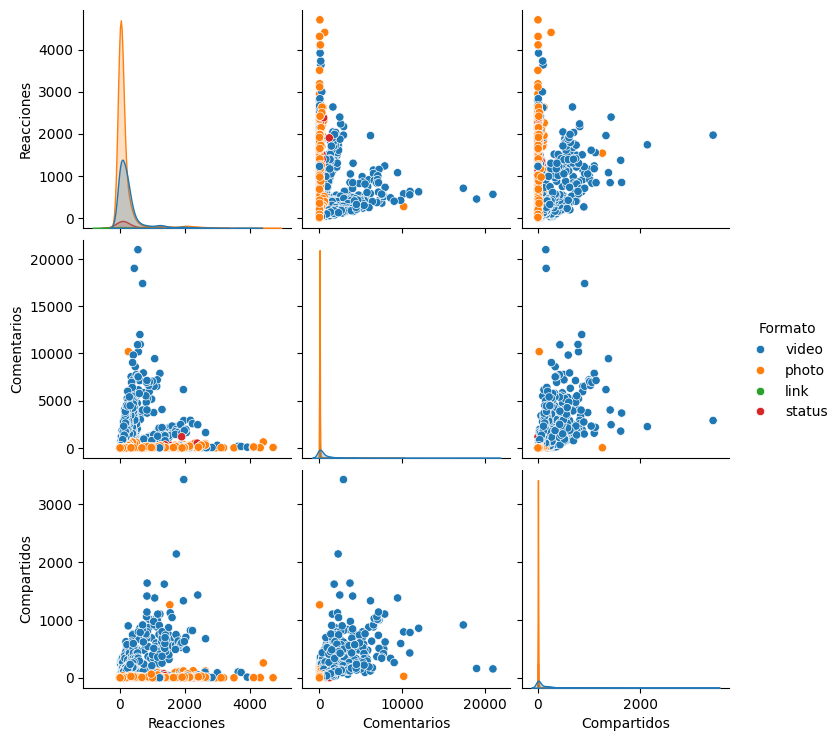

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

colum = ["Formato", "Reacciones", "Comentarios", "Compartidos"]
sns.pairplot(df [colum] , hue="Formato")
plt.show()

💡 Por lo visto en lo graficos podemos ver que las dos formatos dominantes son video y foto. Y que los links como status son muy pocos casos.
Tambien que tanto reacciones como comentarios y compartidos los videos poseen mayor dispersion que las fotos.


## 3. **Preprocesamiento**  
   - Limpieza: Manejen missing values (eliminar, imputar) y outliers (si es necesario).  
   - Limpieza: indique cuáles features descarta. Justifique.
   - Indique si usará o no variables categóricas. Justifique. Realice su preprocesamiento adeucado.
   - El objetivo de este paso es quedar con variables todas numéricas y en la misma escala.

## ✅ Resolución:

Voy a descartar las columnas fecha, y las que detallan el tipo de reacción (ej: like, me gusta, etc); ya que voy a estar enfocando en el formato y el engagemente y no en cuando se publica o que tipo de reacción genera la publicación.

In [ ]:
df = df.drop(["Fecha", "Like", "Me_encanta", "Asombro", "Risa", "Triste", "Enojo"], axis=1)
df.head()

,Formato,Reacciones,Comentarios,Compartidos
0,video,529,512,262
1,photo,150,0,0
2,video,227,236,57
3,photo,111,0,0
4,photo,213,0,0


Justamente, como voy a estar trabajando con el formato de las publicaciones, voy a aplicar el One-hot encoding en esta columna.

In [ ]:
df = pd.get_dummies(df, columns=["Formato"])
df.head()

,Reacciones,Comentarios,Compartidos,Formato_link,Formato_photo,Formato_status,Formato_video
0,529,512,262,False,False,False,True
1,150,0,0,False,True,False,False
2,227,236,57,False,False,False,True
3,111,0,0,False,True,False,False
4,213,0,0,False,True,False,False


Por último, voy a estandarizar las columnas Reacciones, Comentarios y Compartidos, ya que la escala que se utiliza es un dato fundamental para el buen desempeño de estos tipos de modelo.

In [ ]:
#Escalo solo las columnas numericas, y con ayuda del generador de codigo lo mantengo en formato dataframe
from sklearn.preprocessing import StandardScaler

columnas_a_escalar = ["Reacciones", "Comentarios", "Compartidos"]
columnas_no_escalar = [col for col in df.columns if col not in columnas_a_escalar]

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[columnas_a_escalar]),
                           columns=columnas_a_escalar,
                           index=df.index)

df_final = pd.concat([df_scaled, df[columnas_no_escalar]], axis=1)
df_final.head()

,Reacciones,Comentarios,Compartidos,Formato_link,Formato_photo,Formato_status,Formato_video
0,0.646104,0.323350,1.686879,False,False,False,True
1,-0.173192,-0.252206,-0.304144,False,True,False,False
2,-0.006738,0.013089,0.129017,False,False,False,True
3,-0.257499,-0.252206,-0.304144,False,True,False,False
4,-0.037003,-0.252206,-0.304144,False,True,False,False





## 4. **Clustering**  
   

En este apartado aplicará clustering sobre los datos obtenidos del paso 3)

### 4.1 -  K-means
   - Determine el número ideal de clústers usando Silhoutte Score.
   - Aplique K-means sobre los datos procesados del grupo anterior.
   

## ✅ Resolución:

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sil = []
k_values = range (2,10)

for k in k_values:
  kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
  kmeans.fit(df_scaled)
  score = silhouette_score(df_scaled, kmeans.labels_)
  sil.append(score)

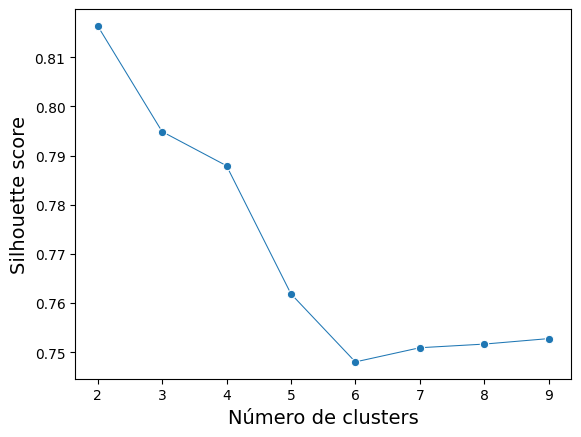

In [ ]:
sns.lineplot(x=k_values,y=sil,marker='o',size=25,legend=False);
plt.ylabel('Silhouette score',fontsize=14);plt.xlabel('Número de clusters',fontsize=14);

En el gráfico podemos ver que el número más optimo es k=2, porque mientas más cercano a 1 sea significa que está mejor etiquetado.
También se ve que existe una gran diferencia entre k=2 y los números posteriores; después de k=6 vemos que no se posee un cambio significativo.

Por lo cual vamos a probar realizando tanto con k=2 como con k=6.


### 4.2 Análisis intra-clúster

Para el modelo de K-means con el valor de k (número de clústeres) ideal, analice los datos que pertenecen a cada clústers. ¿Cuáles son sus características / distribución? Puede usar gráficas como box-plots

**🧪 Probamos con K=2**

Armo el modelo e incluyo una columna Cluster al dataframe. Luego, para corroborar que este bien cuento la cantidad de valores por categoría de esa columna.

In [ ]:
kmeans2 = KMeans(n_clusters=2, n_init=5, random_state=42)
clusters2 = kmeans2.fit_predict(df_scaled)

df_clust_2= df_final.copy()
df_clust_2["Cluster"] = clusters2

df_clust_2["Cluster"].value_counts()

,count
Cluster,
0,6739
1,311


In [ ]:
df_clust_2.groupby("Cluster")[["Reacciones", "Comentarios", "Compartidos"]].mean()

,Reacciones,Comentarios,Compartidos
Cluster,,,
0,-0.047847,-0.156857,-0.162165
1,1.036793,3.398894,3.513918


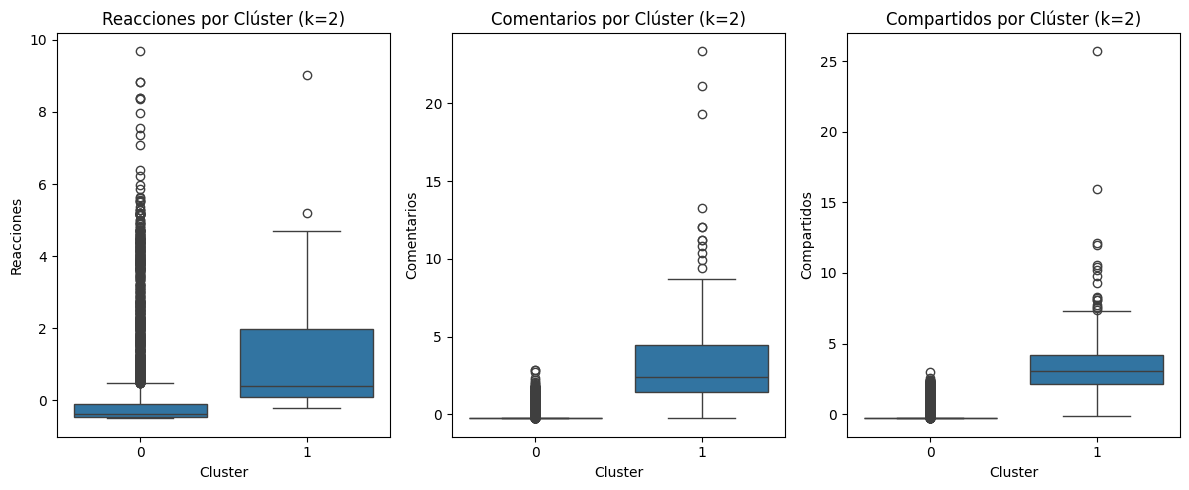

In [ ]:
#Con el boxplot vemos el detalle de cada los cluster con las varibles Reacciones, Comentarios y Compartidos.
var_num = ["Reacciones", "Comentarios", "Compartidos"]

fig, axes = plt.subplots(1, 3, figsize=(12, 5))

for i, var in enumerate(["Reacciones", "Comentarios", "Compartidos"]):
    sns.boxplot(data=df_clust_2, x="Cluster", y=var, ax=axes[i])
    axes[i].set_title(f'{var} por Clúster (k=2)')

plt.tight_layout()
plt.show()

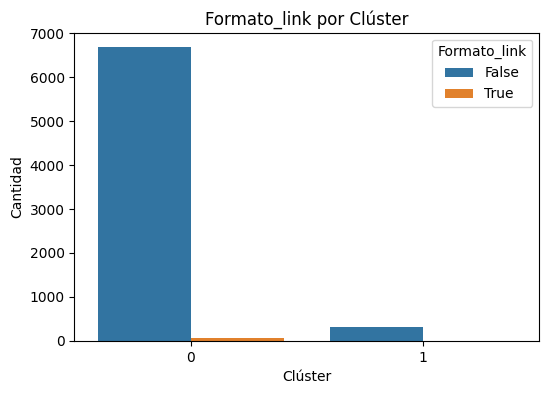

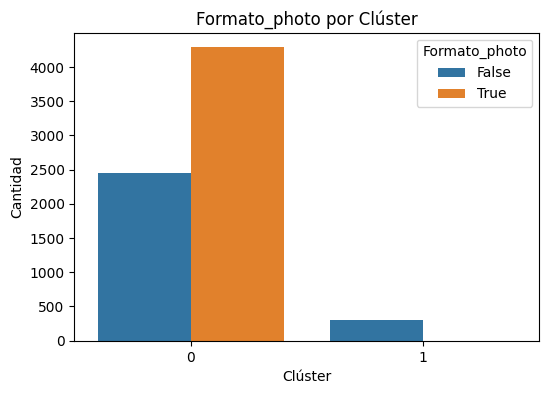

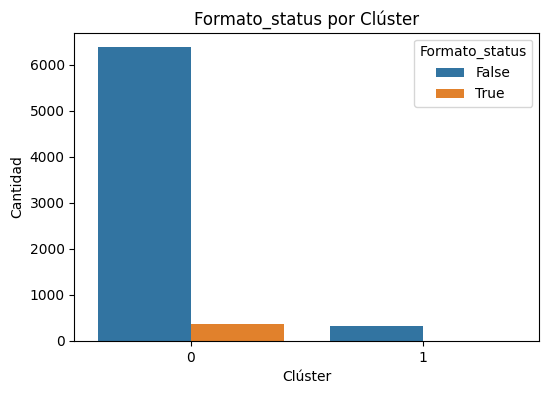

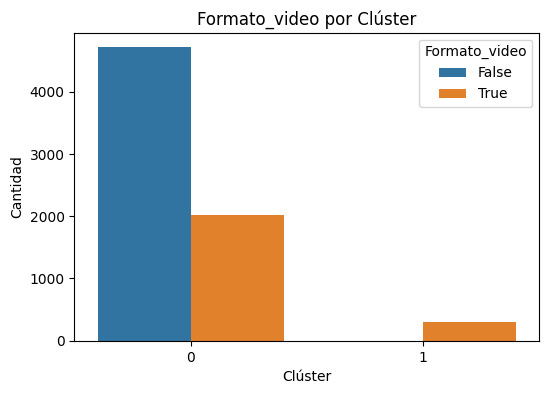

In [ ]:
#Con los cuadros de barra vemos la relacion de los clusters con los diferentes formatos.
formato_vars = ["Formato_link", "Formato_photo", "Formato_status", "Formato_video"]

for var in formato_vars:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df_clust_2, x="Cluster", hue=var)
    plt.title(f'{var} por Clúster')
    plt.ylabel("Cantidad")
    plt.xlabel("Clúster")
    plt.legend(title=var)
    plt.show()

💡 Utilizando k=2 vemos que las publicaciones se dividen en dos grupos, uno con mayor cantidad de elementos que el otro (6739 publicaciones a 311 de publicaciones). Pero al ver la media de los grupos, el que posee menor cantidad de publicaciones es el que posee valores más altos, es decir, un mejor engagement.

💡 Al desplegar los clústeres con las diferentes interacciones, vemos que la más utilizada son las reacciones y la que se utiliza en menor medida por los usuarios es compartir.

💡 Relacionando el engagement con el formato de las publicaciones se puede ver que el grupo que posee mayor engagement (c=1) posee mayor cantidad de videos. Mientras que el grupo con menor interacción de los usuarios posee mayor cantidad de fotos.



**🧪 Probamos con K=6**

In [ ]:
kmeans6 = KMeans(n_clusters=6, n_init=5, random_state=42)
clusters6 = kmeans6.fit_predict(df_scaled)

df_clust_6= df_final.copy()
df_clust_6["Cluster"] = clusters6

df_clust_6["Cluster"].value_counts()

,count
Cluster,
0,5696
3,582
5,373
2,212
1,98
4,89


In [ ]:
df_clust_6.groupby("Cluster")[["Reacciones", "Comentarios", "Compartidos"]].mean()

,Reacciones,Comentarios,Compartidos
Cluster,,,
0,-0.316794,-0.217816,-0.267541
1,2.177403,2.043367,5.228630
2,4.392341,-0.179397,-0.203883
3,0.065345,0.918237,1.458990
4,0.613338,6.874853,3.242350
5,1.520857,-0.181805,-0.222447


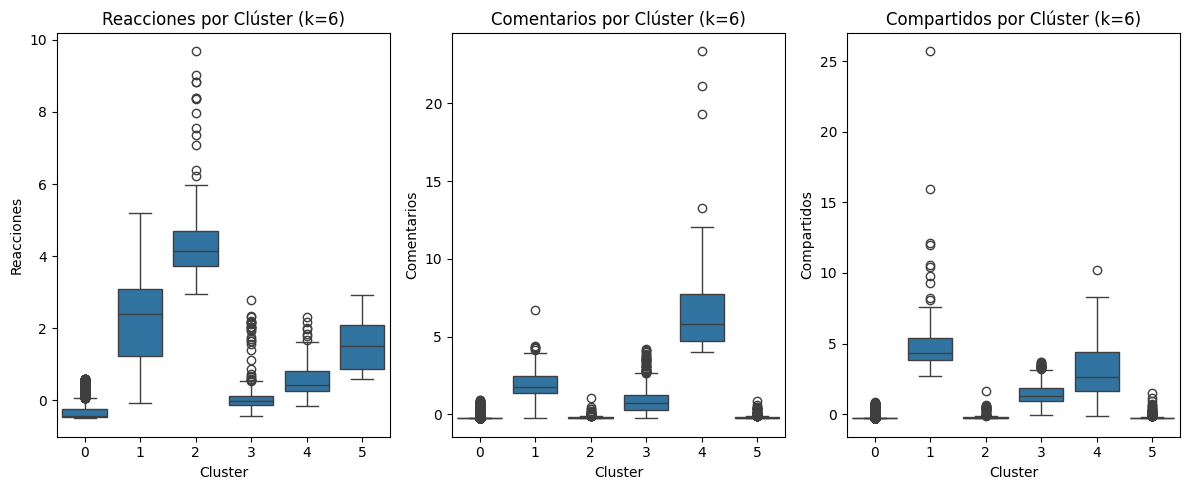

In [ ]:
var_num = ["Reacciones", "Comentarios", "Compartidos"]

fig, axes = plt.subplots(1, 3, figsize=(12, 5))

for i, var in enumerate(["Reacciones", "Comentarios", "Compartidos"]):
    sns.boxplot(data=df_clust_6, x="Cluster", y=var, ax=axes[i])
    axes[i].set_title(f'{var} por Clúster (k=6)')

plt.tight_layout()
plt.show()

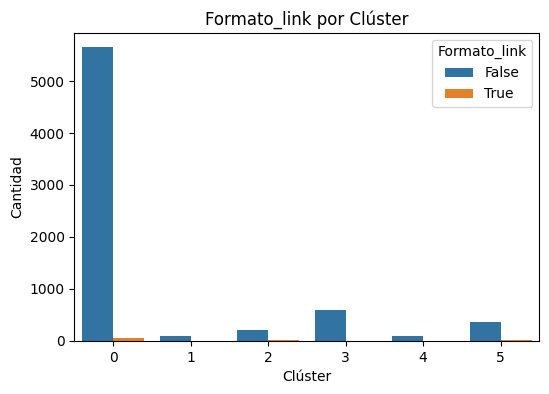

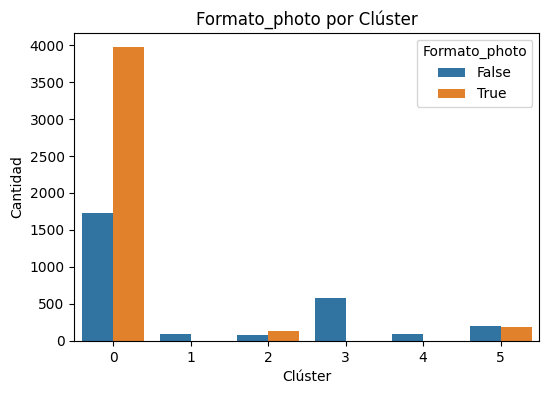

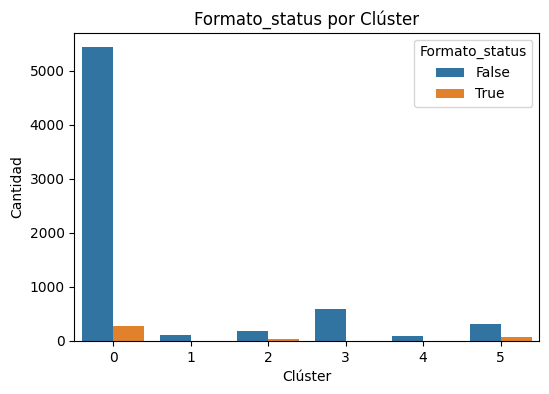

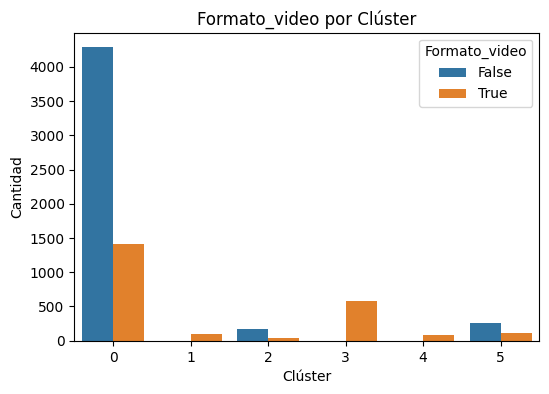

In [ ]:
formato_vars = ["Formato_link", "Formato_photo", "Formato_status", "Formato_video"]

for var in formato_vars:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df_clust_6, x="Cluster", hue=var)
    plt.title(f'{var} por Clúster')
    plt.ylabel("Cantidad")
    plt.xlabel("Clúster")
    plt.legend(title=var)
    plt.show()

💡 Utilizando k=6 vemos que, si bien las publicaciones se encuentran divididas en más grupos, sigue habiendo un grupo con muchas más publicaciones que el resto y con muy bajo engagement.

💡 El **grupo 1** es el que posee mayor cantidad de Compartidos, y se detaca las publicaciones de videos.

💡 El **grupo 2** es que posee mayor cantidad de Reacciones, y dentro de este se posee mayor cantidad de fotos.

💡 El **grupo 4** es el que posee mayor cantidad de Comentarios,y, al igual que el grupo 1, las publicaciones suelen ser mayormente videos.


## 5- Reducción de dimensionalidad

### 5.1 Aplicar PCA o t-SNE para reducir la dimensionalidad a 2D/3D y visualizar los datos

## ✅ Resolución:

In [ ]:
from sklearn.decomposition import PCA

features = [
    "Reacciones", "Comentarios", "Compartidos",
    "Formato_link", "Formato_photo", "Formato_status", "Formato_video"
]

x = df_final[features]

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

df_pca = df_final.copy()
df_pca['PCA1'] = x_pca[:, 0]
df_pca['PCA2'] = x_pca[:, 1]

### 5.2 Clustering sobre datos reducidos

Aplicar clustering K-means sobre el dataset obtenido en 5.1. Realice los mismos pasos y análisis que realizó para el punto 4) pero con este dataset reducido.

## ✅ Resolución:

In [ ]:
sil = []
k_values = range (2,10)

for k in k_values:
  kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
  kmeans.fit(df_pca)
  score = silhouette_score(df_pca, kmeans.labels_)
  sil.append(score)

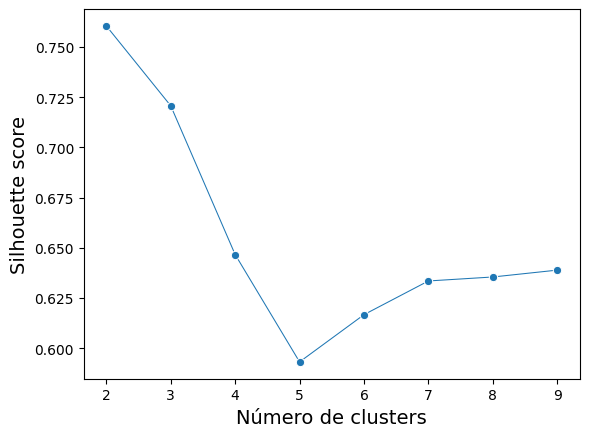

In [ ]:
sns.lineplot(x=k_values,y=sil,marker='o',size=25,legend=False);
plt.ylabel('Silhouette score',fontsize=14);plt.xlabel('Número de clusters',fontsize=14);

Al calcular nuevamente el SS, vemos que en comparación con el grafico anterior los valores han disminuido. De igual manera, se sigue manteniendo k=2 como el valor más óptimo para realizar la división.

Y como en el cuadro anterior, después de k=6 ya no se posee tanta diferencia en la división de grupos.


**🧪 Probamos de nuevo con K=2**

In [ ]:
kmeans_k2 = KMeans(n_clusters=2, n_init=5, random_state=42)
clusters_k2 = kmeans_k2.fit_predict(df_pca)

df_clust_k2= df_pca.copy()
df_clust_k2["Cluster"] = clusters_k2

df_clust_k2["Cluster"].value_counts()

,count
Cluster,
0,6716
1,334


In [ ]:
df_clust_k2.groupby("Cluster")[["Reacciones", "Comentarios", "Compartidos"]].mean()

,Reacciones,Comentarios,Compartidos
Cluster,,,
0,-0.048644,-0.162303,-0.168937
1,0.978130,3.263546,3.396954


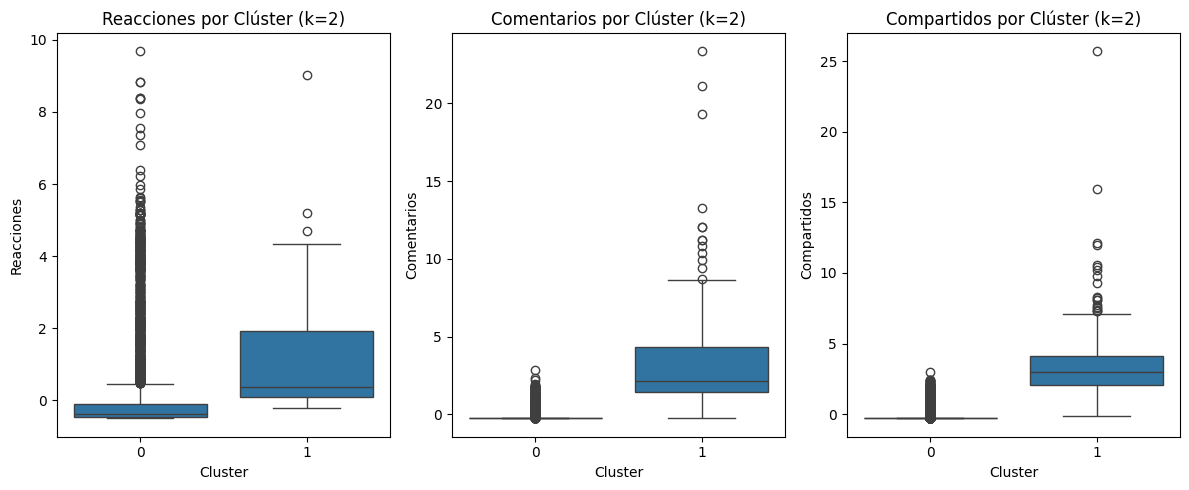

In [ ]:
var_num = ["Reacciones", "Comentarios", "Compartidos"]

fig, axes = plt.subplots(1, 3, figsize=(12, 5))

for i, var in enumerate(["Reacciones", "Comentarios", "Compartidos"]):
    sns.boxplot(data=df_clust_k2, x="Cluster", y=var, ax=axes[i])
    axes[i].set_title(f'{var} por Clúster (k=2)')

plt.tight_layout()
plt.show()

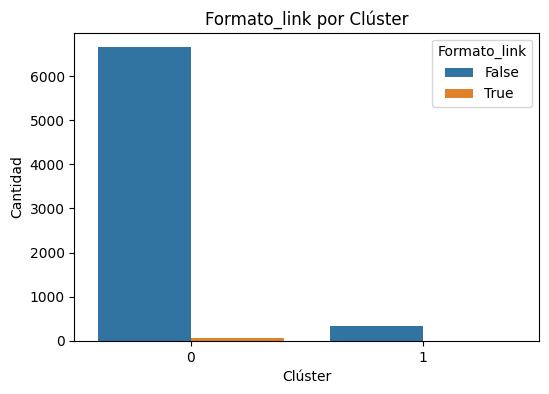

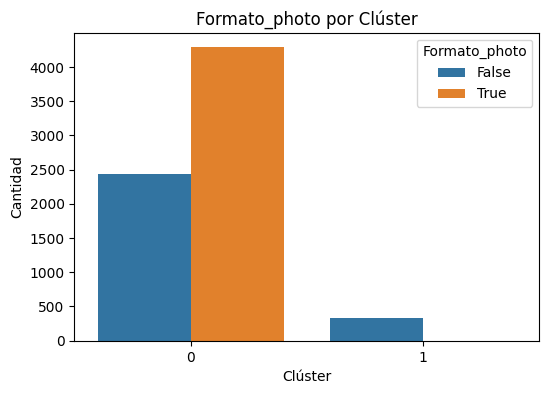

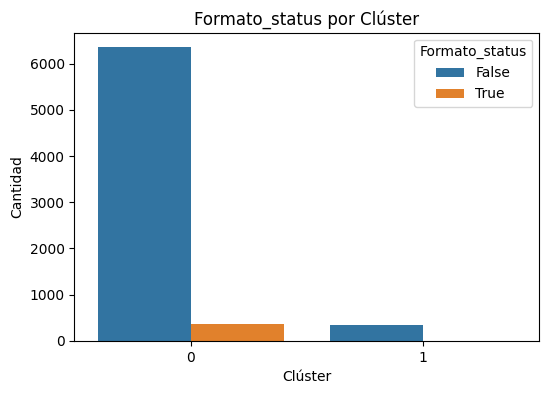

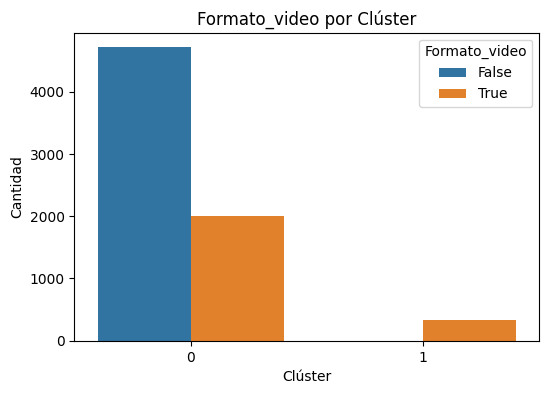

In [ ]:
formato_vars = ["Formato_link", "Formato_photo", "Formato_status", "Formato_video"]

for var in formato_vars:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df_clust_k2, x="Cluster", hue=var)
    plt.title(f'{var} por Clúster')
    plt.ylabel("Cantidad")
    plt.xlabel("Clúster")
    plt.legend(title=var)
    plt.show()

**🧪 Probamos de nuevo con K=6**

In [ ]:
kmeans_k6 = KMeans(n_clusters=6, n_init=5, random_state=42)
clusters_k6 = kmeans_k6.fit_predict(df_pca)

df_clust_k6= df_pca.copy()
df_clust_k6["Cluster"] = clusters_k6

df_clust_k6["Cluster"].value_counts()

,count
Cluster,
0,4071
4,1775
3,578
2,369
5,216
1,41


In [ ]:
df_clust_k6.groupby("Cluster")[["Reacciones", "Comentarios", "Compartidos"]].mean()

,Reacciones,Comentarios,Compartidos
Cluster,,,
0,-0.302027,-0.239565,-0.291565
1,1.324834,8.664534,6.391602
2,3.461362,-0.180691,-0.213756
3,0.013042,0.703609,1.214524
4,-0.200186,-0.186184,-0.234697
5,1.137887,2.826333,3.325800


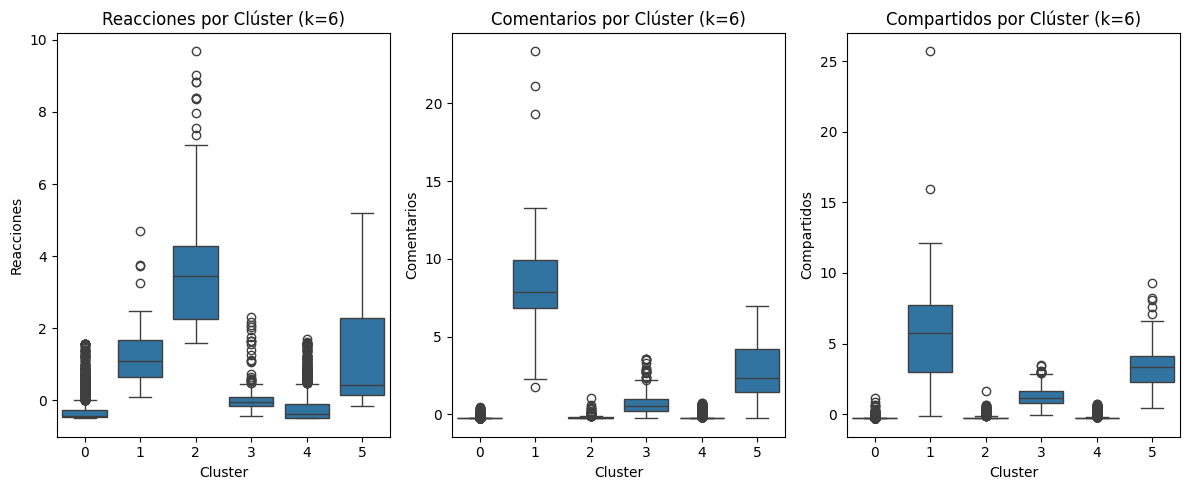

In [ ]:
var_num = ["Reacciones", "Comentarios", "Compartidos"]

fig, axes = plt.subplots(1, 3, figsize=(12, 5))

for i, var in enumerate(["Reacciones", "Comentarios", "Compartidos"]):
    sns.boxplot(data=df_clust_k6, x="Cluster", y=var, ax=axes[i])
    axes[i].set_title(f'{var} por Clúster (k=6)')

plt.tight_layout()
plt.show()

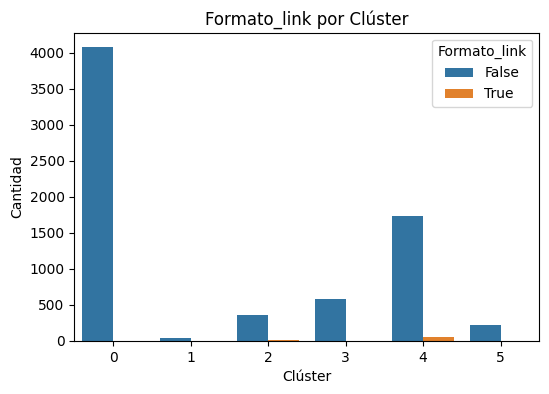

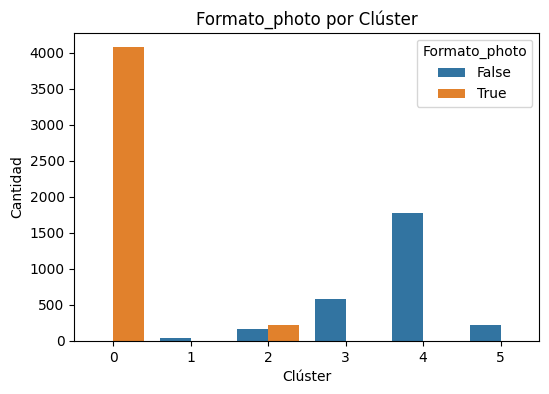

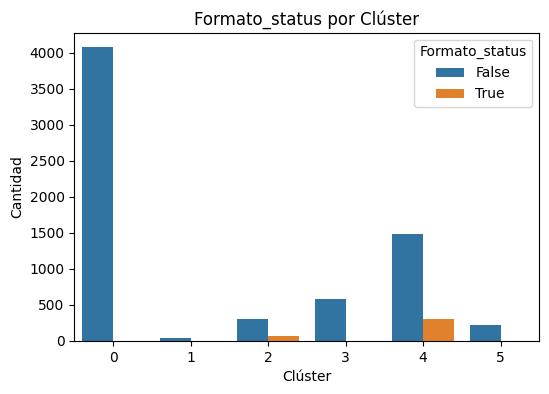

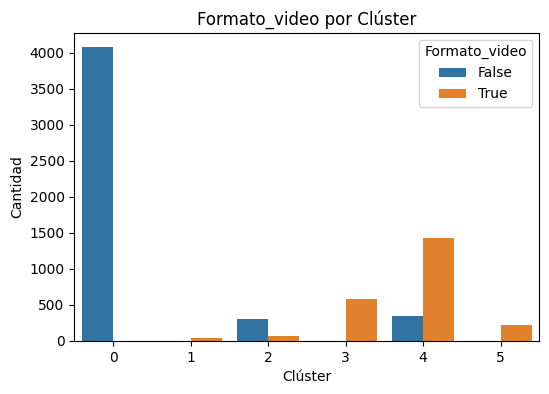

In [ ]:
formato_vars = ["Formato_link", "Formato_photo", "Formato_status", "Formato_video"]

for var in formato_vars:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df_clust_k6, x="Cluster", hue=var)
    plt.title(f'{var} por Clúster')
    plt.ylabel("Cantidad")
    plt.xlabel("Clúster")
    plt.legend(title=var)
    plt.show()

## 6- Conclusiones

Escriba sus conclusiones comparando los resultados y experiencia entre aplicar clustering a todo el dataset vs al dataset reducido.

Discutir:

* ¿ Los clústeres se corresponden con clases reales ( si las hay)?
* ¿ La reducción de dimensionalidad mejoró o empeoró el desempeño del clustering?

Fundamente, justifique con sus palabras.

## ✅ Resolución:

En el caso de Clustering lo realice con dos valores diferentes para K, 2 y 6.
En el caso de k=2 (el valor más optimo según el SS), vemos que hay dos grupos bien diferenciados entre uno que posee valores medios más pequeños (es decir que poseen pocas interacciones) y el otro grupo con mas engagement. Al ser solamente dos grupos fue más fácil el análisis de los mismo con respecto a los formatos utilizados en estas publicaciones.

Para el caso de k=6 (valor en donde estaba el “codo” de la curva), observamos que al ser mayor la cantidad de grupos había una menor diferencia en comparación a k=2 de la cantidad de elementos que integran cada grupo. En este caso se podía diferenciar grupos que poseían mayor cantidad de reacciones, otro con mayor cantidad de comentarios y un tercero con compartidos; es decir que se encontraba más diferenciados por el tiempo de interacción.

La reducción de dimensionalidades no realizo una gran diferencia en el modelo. Los grupos, tanto en K=2 y K=4, quedaron similares a como estaban antes de aplicar PCA.


# 7- Bonus: elija una de las siguientes consignas para resolver.



## 7.1 Aplicar DBSCAN sobre su dataset.

Aplique clustering con DBSCAN sobre su dataset en ambas versiones: el dataset completo y reducido (PCA o t-SNE). Evalue los resultados.

## ✅ Resolución:

**🧪 Probamos de nuevo aplicando DBSCAN sobre el data set completo:**

In [ ]:
print(df_final)

      Reacciones  Comentarios  Compartidos  Formato_link  Formato_photo  \
0       0.646104     0.323350     1.686879         False          False   
1      -0.173192    -0.252206    -0.304144         False           True   
2      -0.006738     0.013089     0.129017         False          False   
3      -0.257499    -0.252206    -0.304144         False           True   
4      -0.037003    -0.252206    -0.304144         False           True   
...          ...          ...          ...           ...            ...   
7045   -0.305057    -0.252206    -0.304144         False           True   
7046   -0.462863    -0.252206    -0.304144         False           True   
7047   -0.493128    -0.252206    -0.304144         False           True   
7048    0.261316    -0.238717    -0.136959         False           True   
7049   -0.460702    -0.252206    -0.304144         False           True   

      Formato_status  Formato_video  
0              False           True  
1              False   

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=20)
labels = dbscan.fit_predict(df_final)

df_clust_dbscan = df_final.copy()
df_clust_dbscan["Cluster"] = labels

df_clust_dbscan["Cluster"].value_counts()

,count
Cluster,
0,4263
1,2010
-1,365
3,336
2,49
4,27


In [ ]:
df_clust_dbscan.groupby("Cluster")[["Reacciones", "Comentarios", "Compartidos"]].mean()

,Reacciones,Comentarios,Compartidos
Cluster,,,
-1,1.881790,2.747442,2.655928
0,-0.133602,-0.237882,-0.290488
1,-0.128008,0.051242,0.191982
2,-0.384071,-0.248536,-0.269405
3,0.145908,-0.218271,-0.289398
4,4.065961,-0.229807,-0.241098


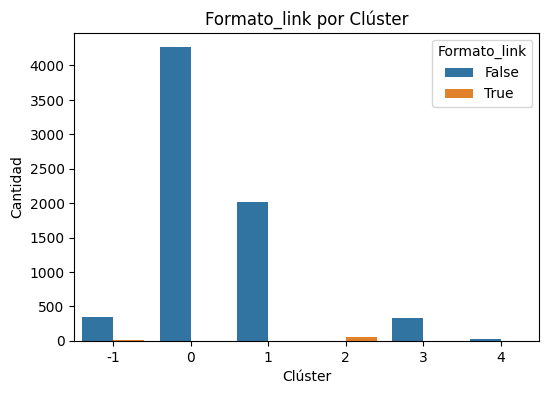

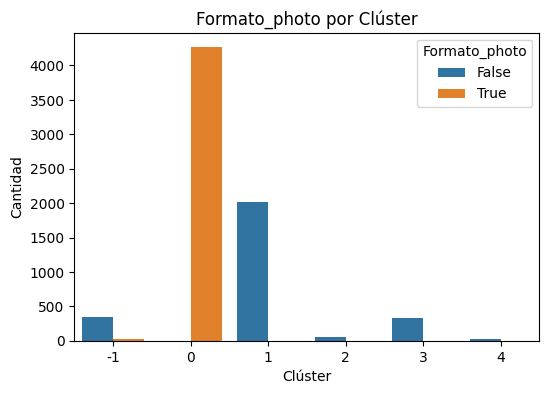

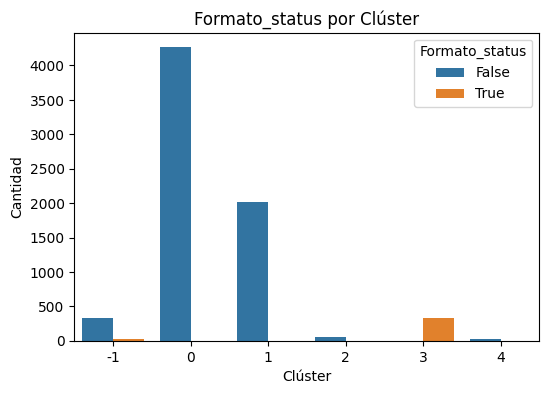

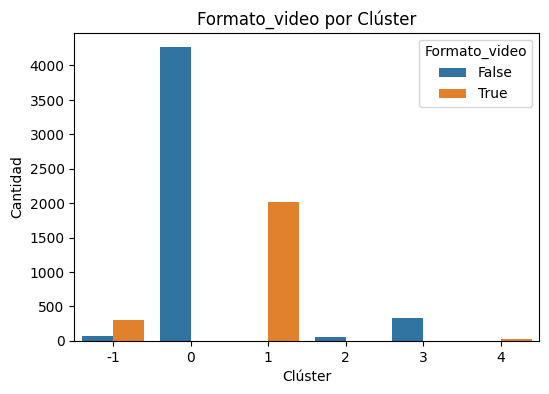

In [ ]:
formato_vars = ["Formato_link", "Formato_photo", "Formato_status", "Formato_video"]

for var in formato_vars:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df_clust_dbscan, x="Cluster", hue=var)
    plt.title(f'{var} por Clúster')
    plt.ylabel("Cantidad")
    plt.xlabel("Clúster")
    plt.legend(title=var)
    plt.show()

💡 Al aplicar DBSCAN al dataset completo vemos que utilizando épsilon 0.5 y un mínimo de ejemplos de 20, vemos que el modelo se dividió en 6 grupos (incluyendo grupo -1 que corresponde a los outliers).

💡 En este caso vemos que el grupo -1 (los “desvíos”) son posee las publicaciones con mayor cantidad de Comentarios y Compartidos. Esto puede estar indicando que estos casos poseen un mayor engagement que la mayoría; puede tratarse de publicaciones virales.

💡 Para el tipo de formato, los grupos que poseen un engagement superior coincide con publicaciones en video. Mientras que los grupos que poseen menor cantidad de interacciones corresponden con publicaciones de links y fotos.


**🧪 Probamos de nuevo aplicando DBSCAN sobre el data set con PCA:**

In [ ]:
features = [
    "Reacciones", "Comentarios", "Compartidos",
    "Formato_link", "Formato_photo", "Formato_status", "Formato_video"
]

x = df_final[features]

pca = PCA(n_components=2)
x_pca2 = pca.fit_transform(x)

df_pca2 = df_final.copy()
df_pca2['PCA1'] = x_pca2[:, 0]
df_pca2['PCA2'] = x_pca2[:, 1]

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=20)
labels = dbscan.fit_predict(df_pca2)

df_pca_dbscan2 = df_pca.copy()
df_pca_dbscan2["Cluster"] = labels

df_pca_dbscan2["Cluster"].value_counts()

,count
Cluster,
0,4249
1,1945
-1,488
3,278
2,48
4,42


❗ Al realizarlo con el dataset con PCA aplicando la misma épsilon y número mínimo de ejemplos para ser considerado clúster, vemos que se presentan diferencias mínimas en comparación al dataset completo.

## 7.2 Análisis de outliers

- Usar DBSCAN para detectar los outliers en su dataset.
- Reducir la dimensionalidad y verificar si los outliers son identificables visualmente en 2D/3D.
- Escriba sus reflexiones: ¿ los outliers forman un clúster propio? ¿PCA / t-SNE preserva las anomalías?

## ✅ Resolución:

En DBSCAN los elementos agrupados en el cluster -1 son los considerados como outliers.

In [ ]:
outlier_counts = df_pca_dbscan2["Cluster"].value_counts()
print(f"Cantidad de outliers (grupo -1):   {outlier_counts[-1]}")

Cantidad de outliers (grupo -1):   488


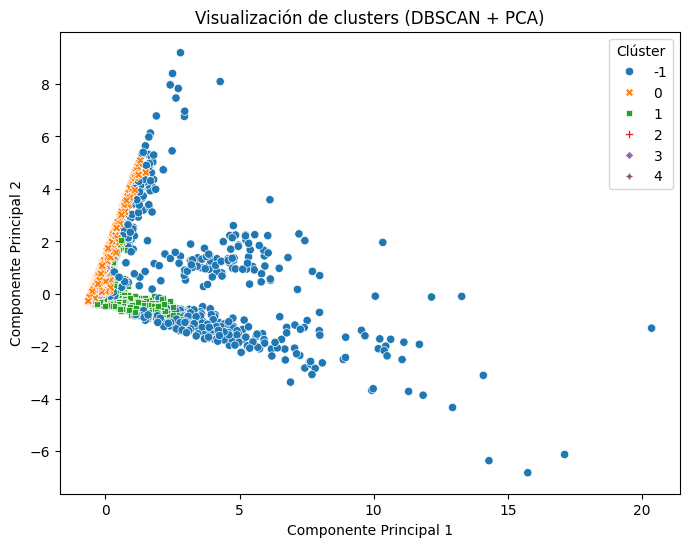

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_pca_dbscan2, x="PCA1", y="PCA2", hue="Cluster", palette="tab10", style="Cluster")
plt.title("Visualización de clusters (DBSCAN + PCA)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Clúster")
plt.show()

💡 Al graficar el modelo con PCA se pueden distinguir claramente los outliers (puntos color azul). Estos forman un grupo propio que corresponde a los puntos más lejanos de los otros centroides.

💡 Al igual de lo visto antes, no hay una diferencia notoria entre el modelo con el dataset completo y el modelo con el dataset con PCA.


# Referencias

👉 Ejemplos utilizados en clases.

👉 Scikit learn (Link: https://scikit-learn.org/0.24/modules/clustering)

👉 Geeks for geeks (Link: https://www.geeksforgeeks.org/machine-learning/)

👉 Generador de codigo de Google Colab.